<a href="https://colab.research.google.com/github/MarieGutiz/SCAnalysis/blob/master/EulerianGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

class DirectedEulerianGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def get_vertices(self):
        vertices = set(self.graph.keys())
        for neighbors in self.graph.values():
            vertices.update(neighbors)
        return list(vertices)

    def has_eulerian_circuit(self):
        in_deg = defaultdict(int)
        out_deg = defaultdict(int)

        for u in self.graph:
            out_deg[u] = len(self.graph[u])
            for v in self.graph[u]:
                in_deg[v] += 1

        all_vertices = self.get_vertices()
        for v in all_vertices:
            if in_deg[v] != out_deg[v]:
                return False
        return True

    def find_eulerian_circuit(self):
            if not self.has_eulerian_circuit():
                return None

            graph_copy = {u: list(vs) for u, vs in self.graph.items()}
            circuit = []
            stack = [next(iter(self.graph))]

            while stack:
                u = stack[-1]
                if graph_copy[u]:
                    v = graph_copy[u].pop()
                    stack.append(v)
                else:
                    circuit.append(stack.pop())

            return circuit[::-1]  # reverse to get the correct order
    def draw_graph(self, path=None):
        G = nx.DiGraph()
        for u in self.graph:
            for v in self.graph[u]:
                G.add_edge(u, v)

        pos = nx.spring_layout(G)
        plt.figure(figsize=(8, 6))

        # Draw the base graph
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=12)

        if path:
            path_edges = list(zip(path, path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
            plt.title("Eulerian Circuit", fontsize=14)

        plt.show()

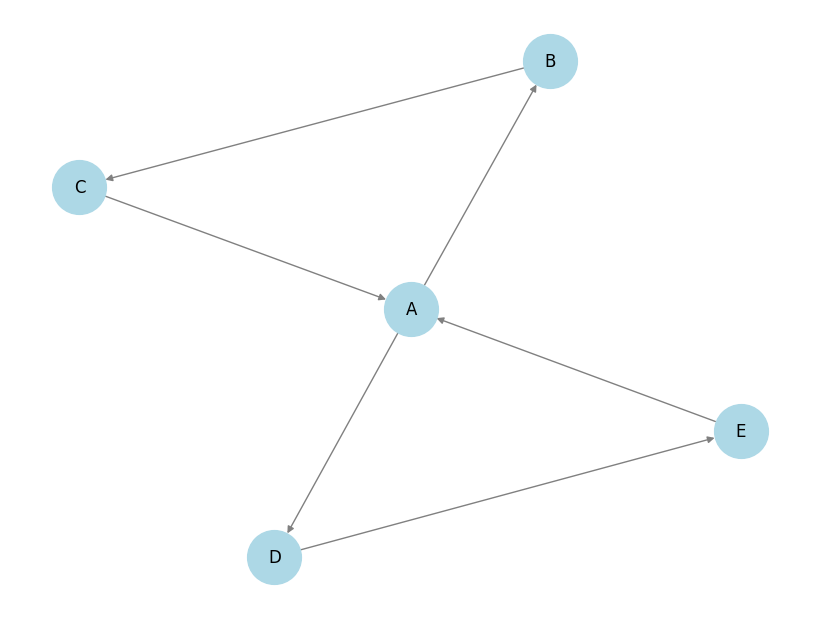

In [15]:

# === Example Usage ===
g = DirectedEulerianGraph()
g.add_edge("A", "B")
g.add_edge("B", "C")
g.add_edge("C", "A")
g.add_edge("A", "D")
g.add_edge("D", "E")
g.add_edge("E", "A")
g.draw_graph()



**Now applying Hierholzer for eulerian circuit in graph**

Directed Circuit: ['A', 'B', 'C', 'A']


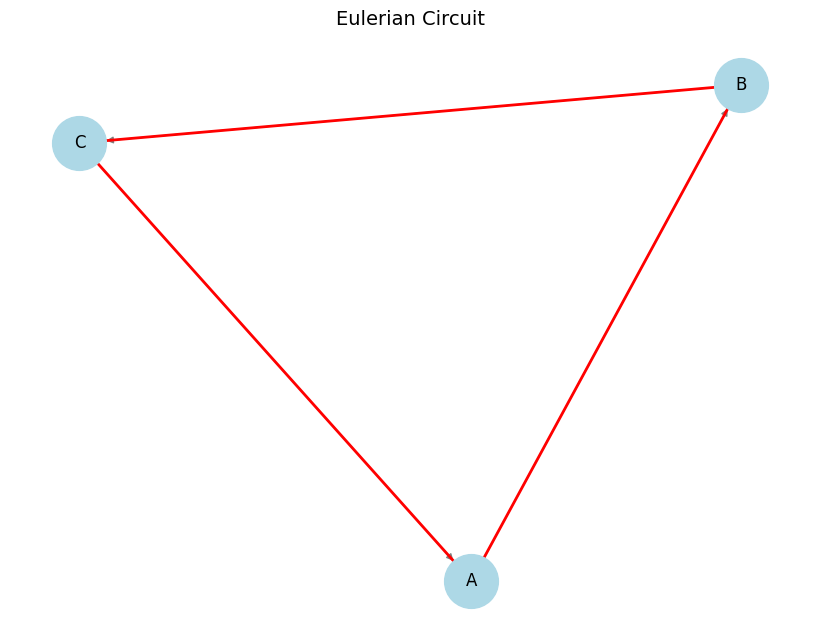

In [16]:
# Directed example
dg = DirectedEulerianGraph()
dg.add_edge("A", "B")
dg.add_edge("B", "C")
dg.add_edge("C", "A")
circuit = dg.find_eulerian_circuit()
print("Directed Circuit:", circuit)
dg.draw_graph(circuit)